In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile  as wavfile
import winsound
# plotting 3D complex plane
from mpl_toolkits.mplot3d import Axes3D
import os

Utils functions

In [2]:
def fnNormalizeFloatTo16Bit(yFloat):
    y_16bit = [int(s*32767) for s in yFloat]
    return(np.array(y_16bit, dtype='int16'))

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalize16BitToFloat(y_16bit):
    yFloat = [float(s/32767.0) for s in y_16bit]
    return(np.array(yFloat, dtype='float'))

## Question 1

The equation to be plotted and sampled is $𝑦(t) = 0.1\cos(2\pi F t)$

In [8]:
def GenSampledSinusoid(A=1,Freq=1000,Phi=0, Fs=16000,sTime=-10,eTime=10):
    #This function returns a sinusoid given its charateristics 
    n = np.arange(sTime,eTime,1.0/Fs)                       #arange does not include end value 
    y = A*np.cos(2 * np.pi * Freq * n + Phi)
    return (n,y)

In [6]:
def stemplot(x,y,figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.stem(x,y,use_line_collection=True,basefmt="b")

Plotting this 1a

function is $y(t)=0.1\cos(2\pi F t)$ with $F_s$ = 16000Hz, F = 1000Hz

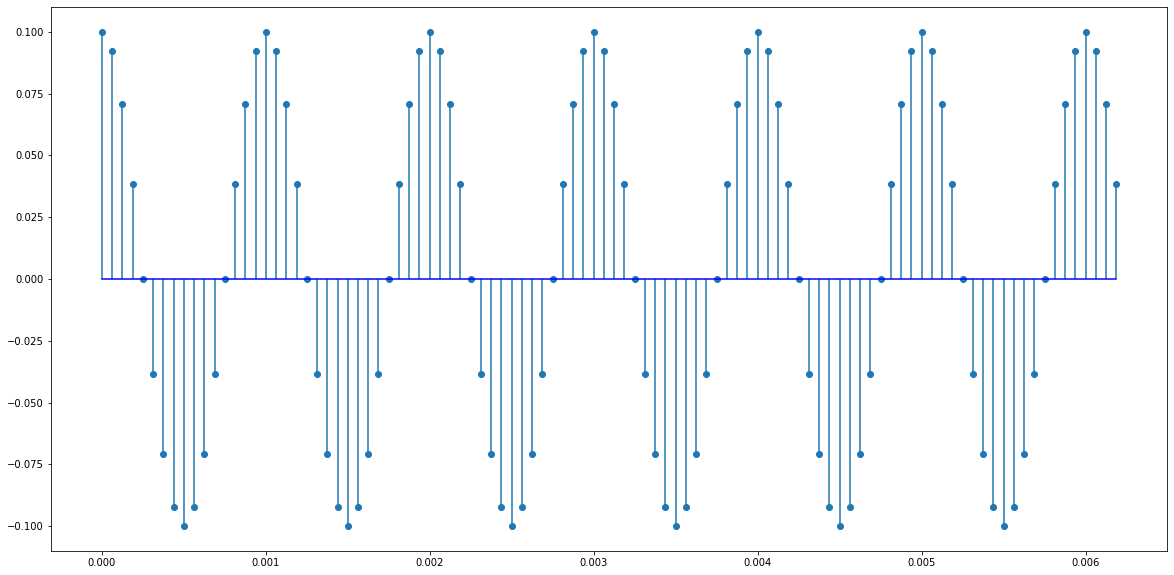

In [7]:
Fs_1a = 16000
F_1a = 1000
num_pts_to_plot=100  #for aesthetics 
sTime_1a=0
eTime_1a = sTime_1a+1.0/Fs_1a*num_pts_to_plot
(x_1a,y_1a) = GenSampledSinusoid(A=0.1,Fs=Fs_1a,Freq=F_1a,sTime=sTime_1a,eTime=eTime_1a)
stemplot(x_1a,y_1a,(20,10))

In [9]:
def playSoundFromWav(x,y,Fs = 16000,filename='t1_16bit.wav'):
    y_1a_16bit = fnNormalizeFloatTo16Bit(y)
    # Lets save the file, fname, sequence, and samplingrate needed
    wavfile.write(filename, Fs, y_1a_16bit)
    # Lets play the wavefile using winsound given the wavefile saved above
    #unfortunately winsound ONLY likes u16 bit values
    #thats why we had to normalize y->y_norm (16 bits) integers to play using winsounds
    winsound.PlaySound(filename, winsound.SND_FILENAME)
    #cleanup
    os.remove(filename)

In [12]:
(x_1a_long,y_1a_long) = GenSampledSinusoid(A=0.5,Fs=16000,Freq=1000,sTime=0,eTime=1.4)
#the one we did above is too short for a sound, we will make a longer one
playSoundFromWav(x_1a_long,y_1a_long)

Generate a bunch of files in steps defined

In [14]:
start_f=2000
stop_f=32000
step=2000
Amp = 1
Fs=16000
for f in range(start_f,stop_f+step,step):
    print(f"Playing sound for freq = {f}")
    (x,y) = GenSampledSinusoid(A=Amp,Fs=Fs,Freq=f,sTime=0,eTime=0.5)
    playSoundFromWav(x,y,Fs=Fs)

Playing sound for freq = 2000
Playing sound for freq = 4000
Playing sound for freq = 6000
Playing sound for freq = 8000
Playing sound for freq = 10000
Playing sound for freq = 12000
Playing sound for freq = 14000
Playing sound for freq = 16000
Playing sound for freq = 18000
Playing sound for freq = 20000
Playing sound for freq = 22000
Playing sound for freq = 24000
Playing sound for freq = 26000
Playing sound for freq = 28000
Playing sound for freq = 30000
Playing sound for freq = 32000


### Explaining aliasing

We can see that each sound as an increasing pitch up to 8kHz, then decreasing pitch till 16kHz, then increase pitch to 24kHz, then decrease again at 32kHz. This is due to aliasing, where by the sample frequency of 16kHz is not sufficient for the given F (Fs $>=$ 2f)

As such starting at 8kHz onwards, due to insufficient sampling rate, the points sampled can be reconstructed into sinusoid of different frequencies (these sinusoids are hence called aliases -- due to the fact that they pass by the same set of points). The reconstruction algorithm will then pick the sinusoid with lowest frequency. As such we will hear the sound of decreasing pitch from 8kHz - 16kHz as the aliases mirror each other through 8kHz mark. 

The same thing happen fro 16khz - 32khz, with 24khz being the mirror line

### 1b 

We shall now generate a) y(t) b) y[nT] for 6 cycles

<StemContainer object of 3 artists>

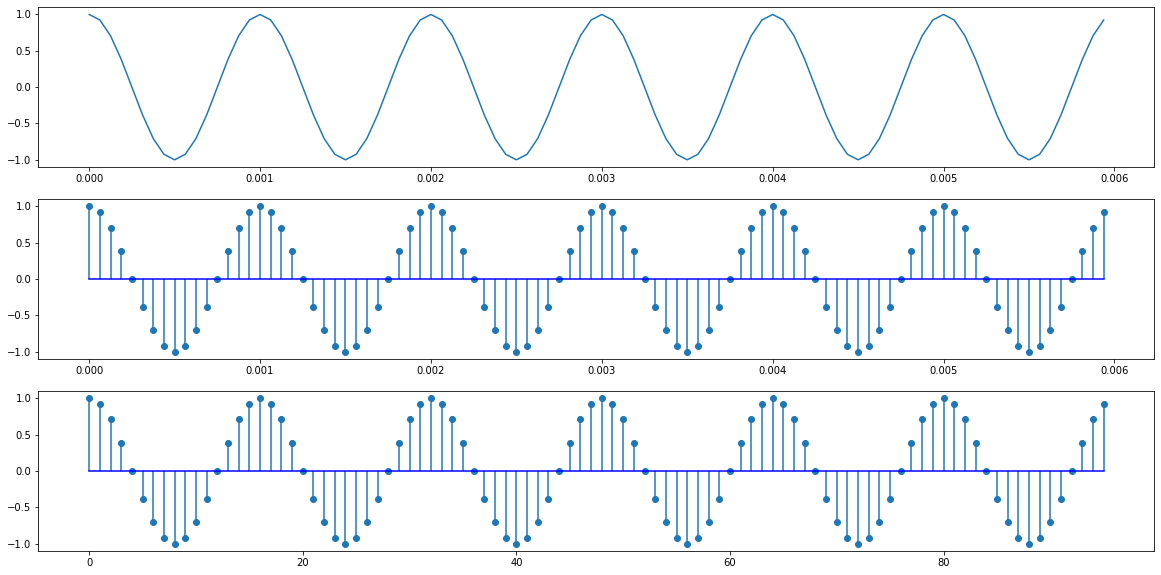

In [15]:
Fs_1b = 16000
f_1b=1000
num_cycles = 6
num_pts_to_plot=int(Fs_1b/f_1b*num_cycles)
sTime_1b=0
(x_1b,y_1b) = GenSampledSinusoid(A=1,Fs=Fs_1b,Freq=f_1b,sTime=sTime_1b,eTime=sTime_1b+1.0/Fs_1b*num_pts_to_plot)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(x_1b,y_1b)
plt.subplot(312)
plt.stem(x_1b,y_1b,use_line_collection=True,basefmt="b")
plt.subplot(313)
plt.stem(np.arange(0,len(x_1b),1),y_1b,use_line_collection=True,basefmt="b")

**i. Comment on the relationships between y(t), y\[nT\].** \
y(t) is continous signal in time whereas y\[nT\] is a sampled signal. Both functions are with respect to time, hence their x-axes are the same. \
**ii. Comment on y\[nT\] vs y\[n\].** \
y\[nT\] is the sampled signal and y\[n\] is the discrete signal. Both functions are discrete and their x-axes are in time and number of samples respectively

**iii. Periodic proof** \
For a discrete signal to be periodic, there exist an integer K such that \
y\[n\] = y\[n+K\] -- it means after K number of samples, the signal will repeat itself \
\
**We assume that the signal is periodic, aka there exist a K such that y\[n\] = y\[n+K\]**\
\
By applying the formula $y[n]=0.1\cos(2\pi \frac{F}{F_s} n)$ to both sides: \
$0.1\cos(2\pi \frac{F}{F_s} n)=0.1\cos(2\pi \frac{F}{F_s} (n+K))$ \
$0.1\cos(2\pi \frac{F}{F_s} n)=0.1\cos(2\pi \frac{F}{F_s} n +2\pi \frac{F}{F_s} K)$ \
Now we know that cosine is periodic for every 2 $\pi$ so \
$\cos(n) = \cos(n + 2\pi) = \cos(n + 4\pi) = ... = \cos(n + m2\pi)$ where m is an integer\
\
As such, if $y[n]$ is periodic , that means $2\pi \frac{F}{F_s} K$ needs to be a multiple of 2$\pi$ \
aka $\frac{F}{F_s}K$ is an integer \
For our question, F = 1000, Fs = 16000, hence the minimum K that will satisfy that condition is K = 16. As such, the signal is periodic every 16 samples \
\
\*It is also important to note that if $\frac{F}{F_s}$ is irrational, there will not be any integer K that will make $\frac{F}{F_s}K$ an integer. For such case, we can conclude that such discrete signal is aperiodic.

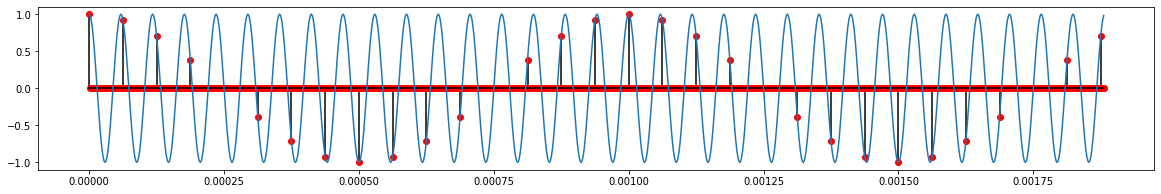

In [177]:
F_1biv = 17000
num_pts_percycle = 32
num_of_cycles = 32
x_1biv = np.arange(0,num_of_cycles/F_1biv,1/F_1biv/num_pts_percycle)
y_1biv = np.cos(2*np.pi*F_1biv*x_1biv)
y_alias = np.zeros_like(y_1biv)
for i in range(len(x_1biv)):
    if i%34 == 0:
        y_alias[i] = np.cos(2*np.pi*F_1biv*x_1biv[i])
plt.figure(figsize=(20,3))
plt.stem(x_1biv,y_alias,use_line_collection=True,markerfmt="ro",basefmt="k",linefmt="k")
plt.plot(x_1biv,y_1biv)


We see that although the sinusoid has 6 cycles, each of period 1/17000s\
due to inadequate sampling, it will only sample after 1/16000s. \
From these sampled points, the reconstruction algorithm will pick a different alias curve that has lowest frequency \
which in this case we can see that the reconstructed curve will have a much lower frequency than the original\

1c

<StemContainer object of 3 artists>

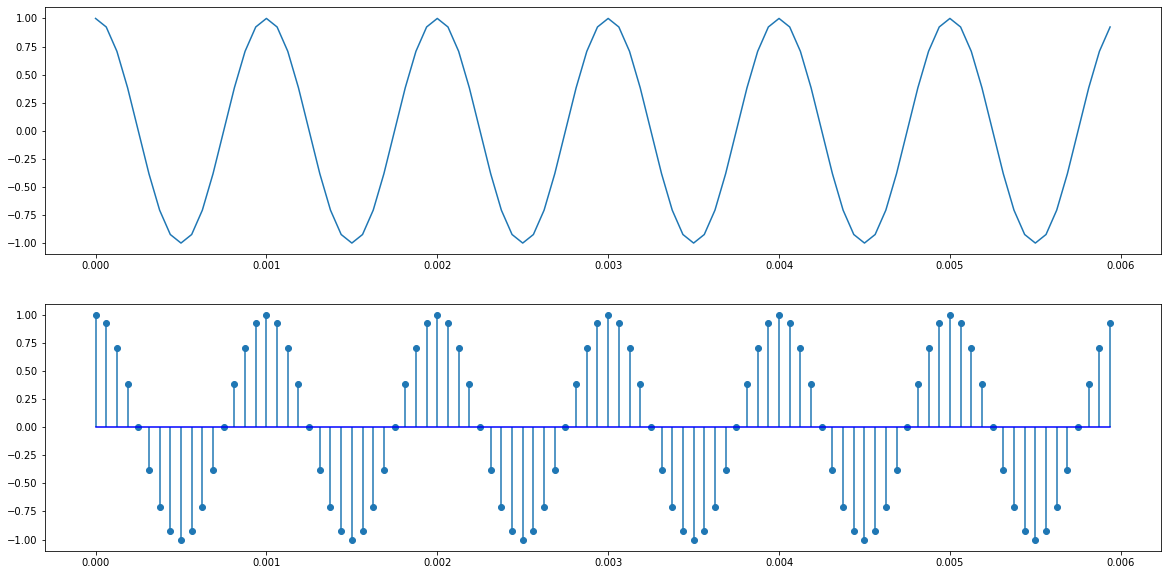

In [102]:
Fs_1c = 16000
f_1c=1000
num_cycles = 6
num_pts_to_plot=int(Fs_1c/f_1c*num_cycles)
sTime_1c=0
(x_1c,y_1c) = GenSampledSinusoid(A=1,Fs=Fs_1c,Freq=f_1c,sTime=sTime_1c,eTime=sTime_1c+1.0/Fs_1c*num_pts_to_plot)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x_1c,y_1c)
plt.subplot(212)
plt.stem(x_1c,y_1c,use_line_collection=True,basefmt="b")

Yep it's the same as it depends on F/Fs

## 2. DFMT

In [9]:
class DTMFGenerator:
    user_freq = [697.0, 770.0, 852.0, 941.0,1209.0, 1336.0, 1477.0, 1633.0]
    user_tones = {
            '1': (user_freq[0], user_freq[4]),
            '2': (user_freq[0], user_freq[5]),
            '3': (user_freq[0], user_freq[6]),
            'A': (user_freq[0], user_freq[7]),
            '4': (user_freq[1], user_freq[4]),
            '5': (user_freq[1], user_freq[5]),
            '6': (user_freq[1], user_freq[6]),
            'B': (user_freq[1], user_freq[7]),
            '7': (user_freq[2], user_freq[4]),
            '8': (user_freq[2], user_freq[5]),
            '9': (user_freq[2], user_freq[6]),
            'C': (user_freq[2], user_freq[7]),
            '*': (user_freq[3], user_freq[4]),
            '0': (user_freq[3], user_freq[5]),
            '#': (user_freq[3], user_freq[6]),
            'D': (user_freq[3], user_freq[7])
        }
    def genDTMF(key,Fs,dur,A=0.5,sTime=0,Phi=0):
        if key in DTMFGenerator.user_tones:
            (f1,f2) = DTMFGenerator.user_tones.get(key)
            t = np.arange(sTime,dur,1.0/Fs)
            yfloat = A*(np.cos(2*np.pi*f1*t+Phi)+np.cos(2*np.pi*f2*t+Phi))
            return (t,yfloat)
        else:
            print("Press a valid key le")
    def genDTMFseq(keyseq,Fs,durseq,A=0.5,sTime=0,Phi=0):
        assert len(keyseq) == len(durseq), "keyseq len is different from durseq"
        t = np.arange(sTime,sum(durseq),1.0/Fs)
        y = np.array([])
        for index, dur in enumerate(durseq):
            _,y_seg = DTMFGenerator.genDTMF(keyseq[index],Fs,dur)
            y = np.concatenate((y,y_seg),axis=None)
        return (t,y)

In [15]:
DTMFGen = DTMFGenerator()
(t_2,y_2) = DTMFGenerator.genDTMF('1',16000,1.0)
playSoundFromWav(t_2,y_2)

In [10]:
(t_2,y_2) = DTMFGenerator.genDTMFseq('123456789',16000,[0.1*(i+1) for i in range(9)])
playSoundFromWav(t_2,y_2)

## Q3

<StemContainer object of 3 artists>

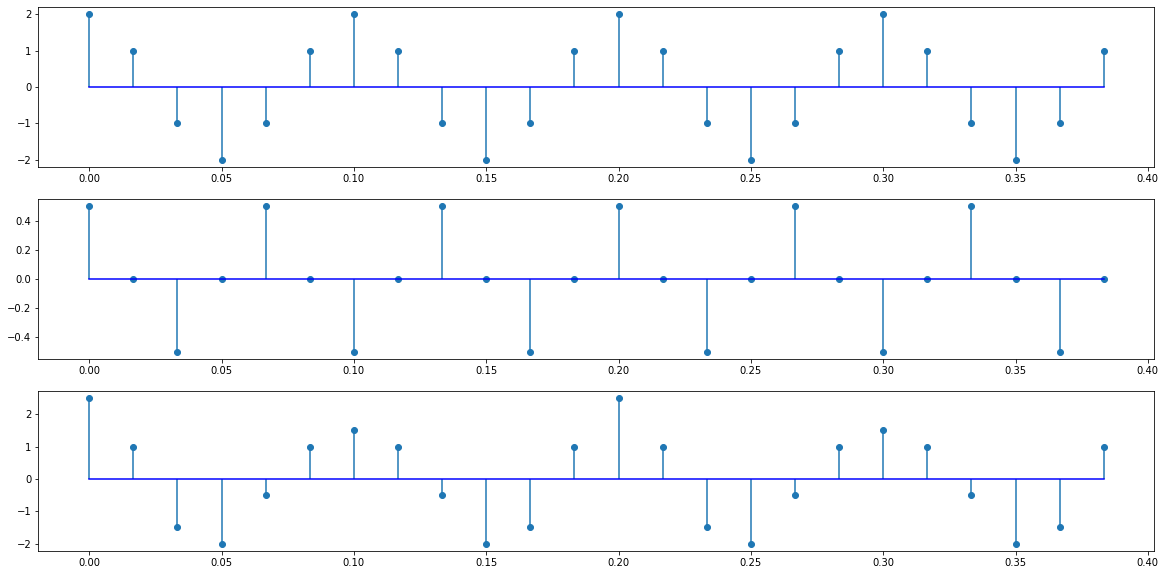

In [17]:
A3 = 2
B3 = 0.5
Fs3= 60
num_cycles = 6
num_pts_to_plot=int(Fs3/15*num_cycles)
sTime3=0


x_n_3,y1_3 = GenSampledSinusoid(A=A3,Freq=10,Phi=0, Fs=Fs3,sTime=sTime3,eTime=sTime3+1.0/Fs3*num_pts_to_plot)
_ , y2_3=GenSampledSinusoid(A=B3,Freq=15,Phi=0, Fs=Fs3,sTime=sTime3,eTime=sTime3+1.0/Fs3*num_pts_to_plot)

plt.figure(figsize=(20,10))
plt.subplot(311)
plt.stem(x_n_3,y1_3,use_line_collection=True,basefmt="b")
plt.subplot(312)
plt.stem(x_n_3,y2_3,use_line_collection=True,basefmt="b")
plt.subplot(313)
plt.stem(x_n_3,y1_3+y2_3,use_line_collection=True,basefmt="b")

$$f3=gcd(f1,f2)$$

d. \
It is a periodic signal so it's a power signal (infinite energy) \
for the period of $f_{3}$, $T_{3}$ of 0.2s = 2 $T_{1}$ = $3 T_{2}$ \
Power of $f_{1}, P_{1}$ is $A^2/2$ \
Power of $f_{2}, P_{2}$ is $B^2/2$ \
Power of $f_{3}$ is 

$
P_{3}= 1/T * \lim_{T\rightarrow \infty} {1 \over {T}} \int_{0}^T |A\cos(2\pi 10 t)+B\cos(2\pi 15 t)|^2 dt \\
= 1/T * \lim_{T\rightarrow \infty} {1 \over {T}} \int_{0}^T [ A^2\cos^2(2\pi 10 t)+B^2\cos^2(2\pi 15 t) +2AB\cos(2\pi 10 t)\cos(2\pi 15 t)]dt \\
= 1/T * \lim_{T\rightarrow \infty} {1 \over {T}} \int_{0}^T [ A^2 *\frac{1 + \cos(2\pi 20 t)}{2} + B^2 *\frac{1 + \cos(2\pi 30 t)}{2}+ ] dt \\
= 1/T * [ A^2 *(\frac{1}{2}|_{0}^T+ sumsinusoid|_{0}^T ) + B^2 *(\frac{1}{2}|_{0}^{T} + sumsinusoid|_{0}^T) +2AB*sumsinusoid|_{0}^T ]
= \frac{A^2}{2} + \frac{B^2}{2} 
$

we can prove that the $2AB*\frac{\cos(2\pi25t) + \cos(2\pi5 t)}{2}$ will always integrate to 0 because:\
the combined frequency $f_0 = gcd(f_1,f_2)$ -> period $T_0 = 1/gcd(f_1,f_2) $\
by math, $gcd(f_1,f_2) = gcd(f_1+f_2,f_2) = gcd(f_1-f2,f_2)$ aka the $2AB*\frac{\cos(2\pi25t) + \cos(2\pi5 t)}{2}$ will have complete cycles within T0



## Q.4

In [18]:
Amp_4 = 0.95
somega_4 = 2*np.pi/36
phi_4=0

numSamples = 200
n_4 = np.arange(0, numSamples, 1)
y_4= np.multiply(np.power(Amp_4, n_4), np.exp(1j * somega_4 * n_4+phi_4))

In [175]:
### Packed version 
def qn_4(Amp_4 = 0.95,somega_4 = 2*np.pi/36, phi_4=0,    numSamples = 200):

    n_4 = np.arange(0, numSamples, 1)
    y_4= np.multiply(np.power(Amp_4, n_4), np.exp(1j * somega_4 * n_4+phi_4))
    
    fig = plt.figure(1,figsize=(45,15))
    plt.rcParams['legend.fontsize'] = 10
    plt.subplot(131)
    plt.plot(n_4[0:numSamples], y_4[0:numSamples].real,'y--o')
    plt.plot(n_4[0:numSamples], y_4[0:numSamples].imag,'k--o')
    plt.xlabel('sample index n'); plt.ylabel('y[n]')
    plt.title('Complex exponential (red=real) (green=imag)')
    plt.grid()
    
    plt.subplot(132,projection='polar')
    for y in y_4:
        plt.polar([0,np.angle(y)],[0,np.abs(y)],marker='o')

    plt.title('Polar plot showing phasors at n=0..N')

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    scaling_factor = 1
    scaling = np.array([np.power(scaling_factor,int(i)) for i in range(len(n_4))])
    scaled_y4 = scaling*y_4
    reVal = scaled_y4[0:numSamples].real
    imgVal = scaled_y4[0:numSamples].imag
    ax.plot(n_4,reVal, imgVal,  label='complex exponential phasor')
    ax.scatter(n_4,reVal,imgVal, c='k', marker='o')
    ax.set_xlabel('sample n')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    ax.legend()
    plt.show()


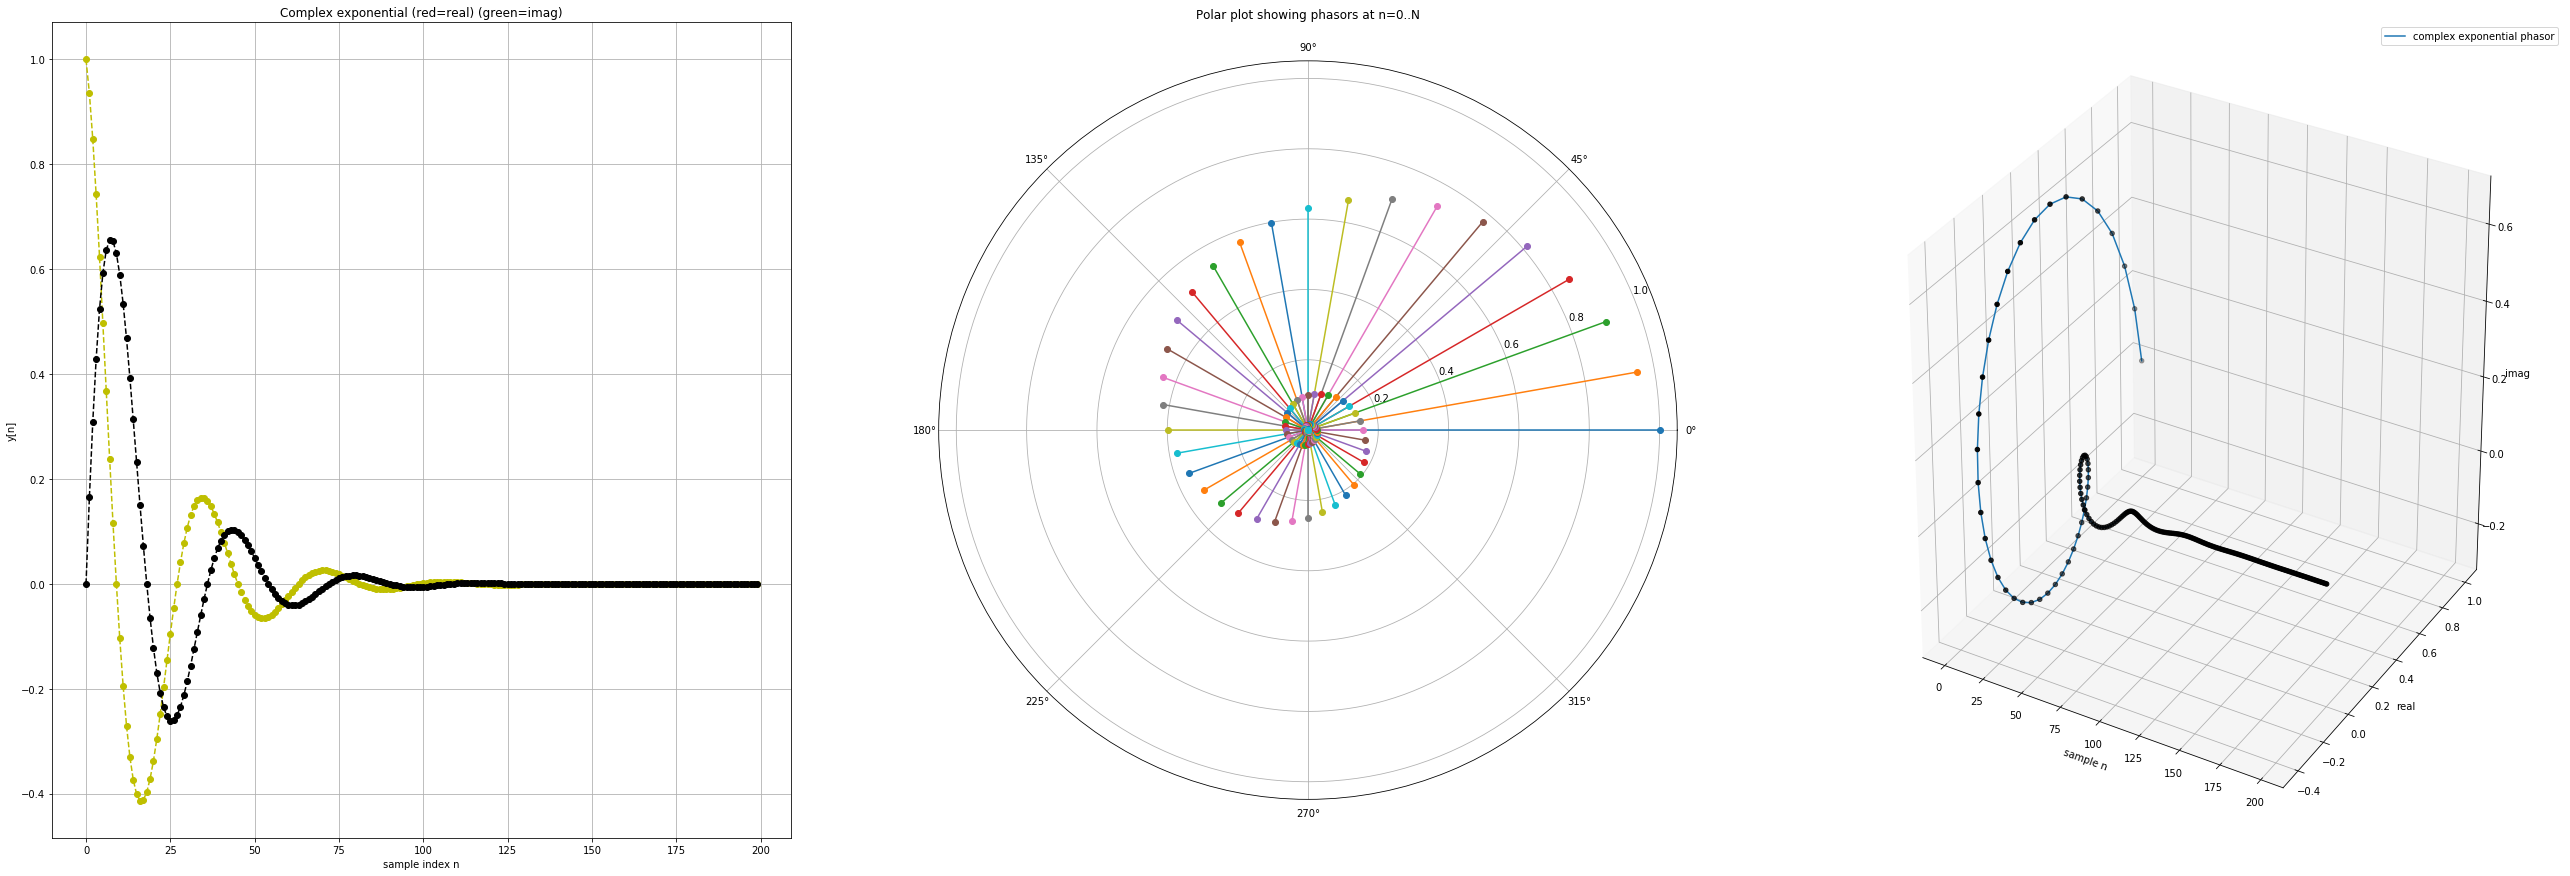

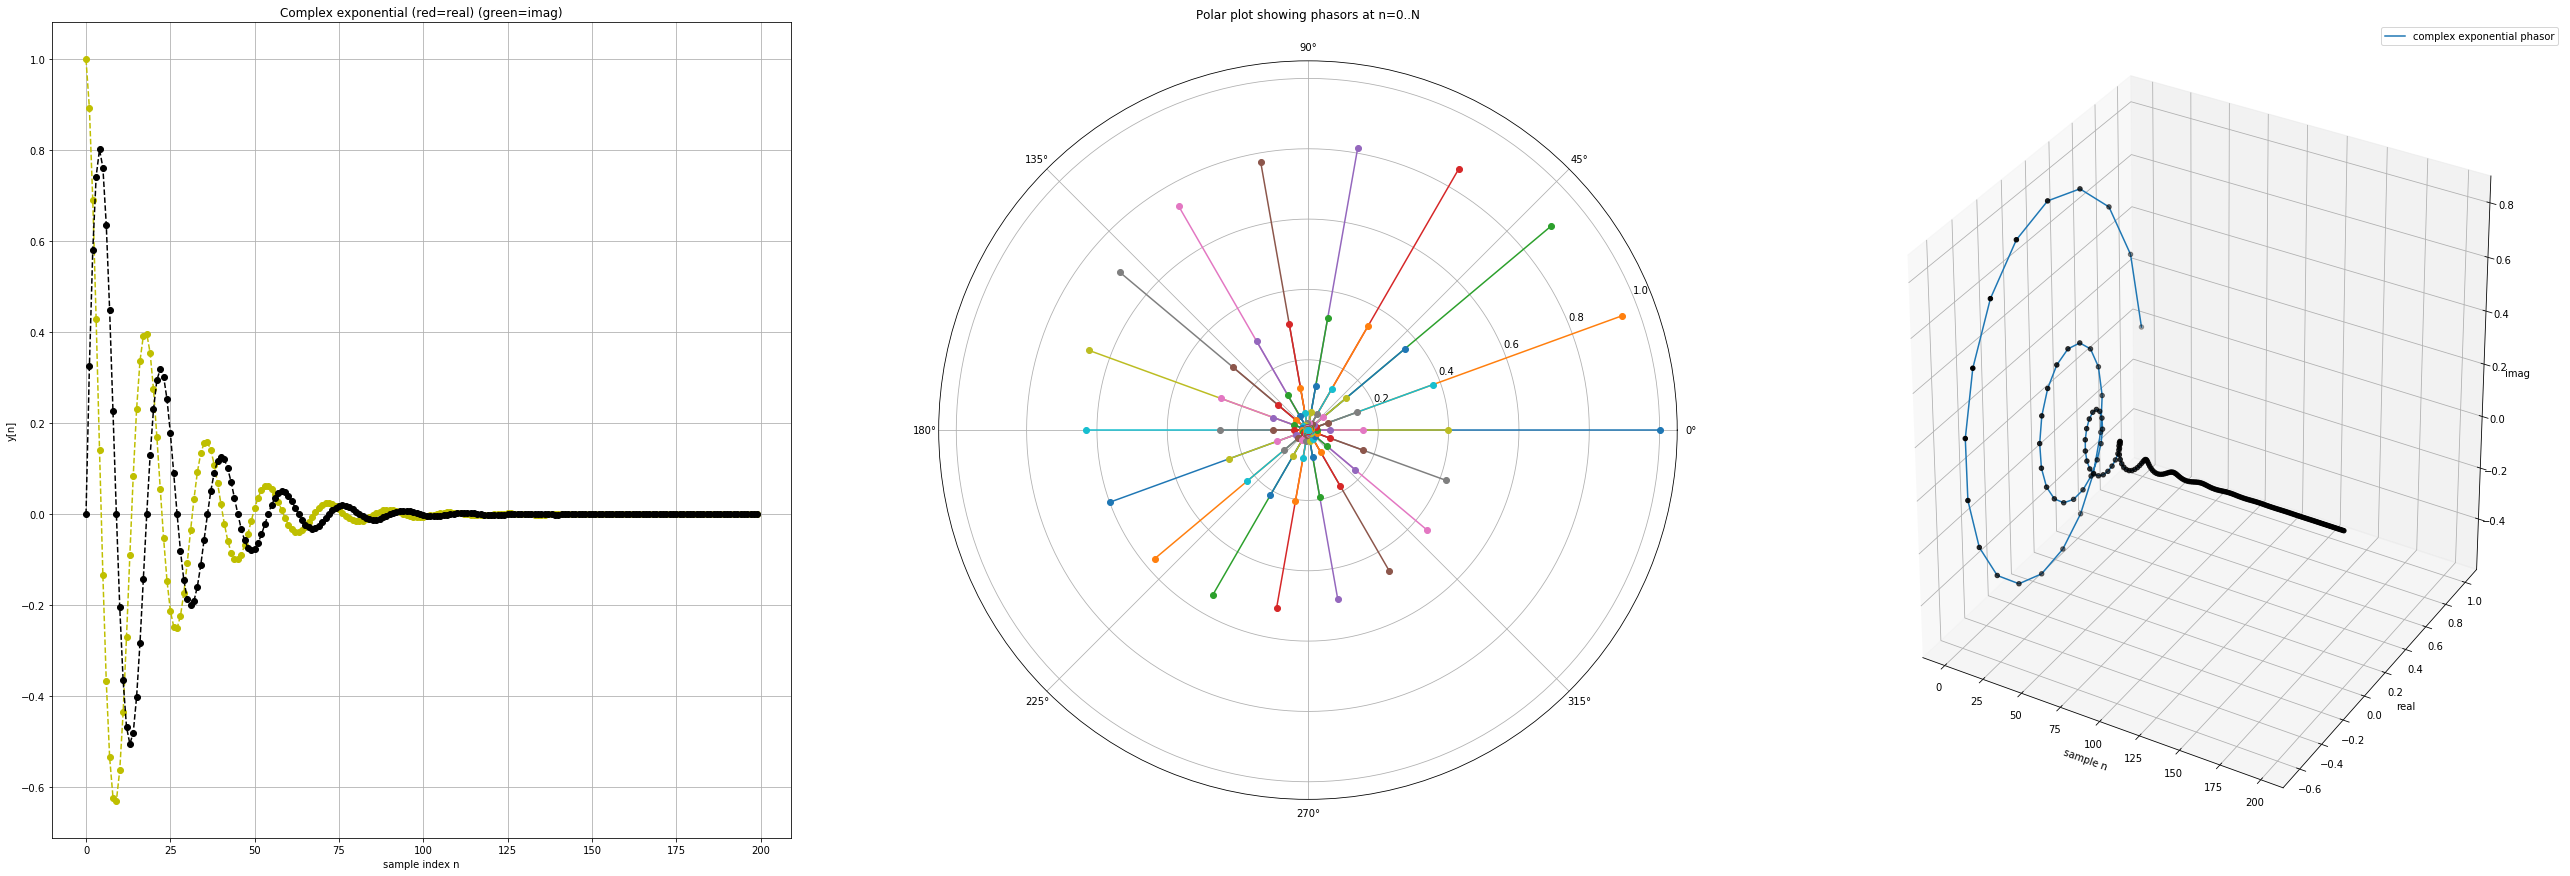

In [174]:
qn_4()
qn_4(somega_4=2*np.pi/18)

## Q5

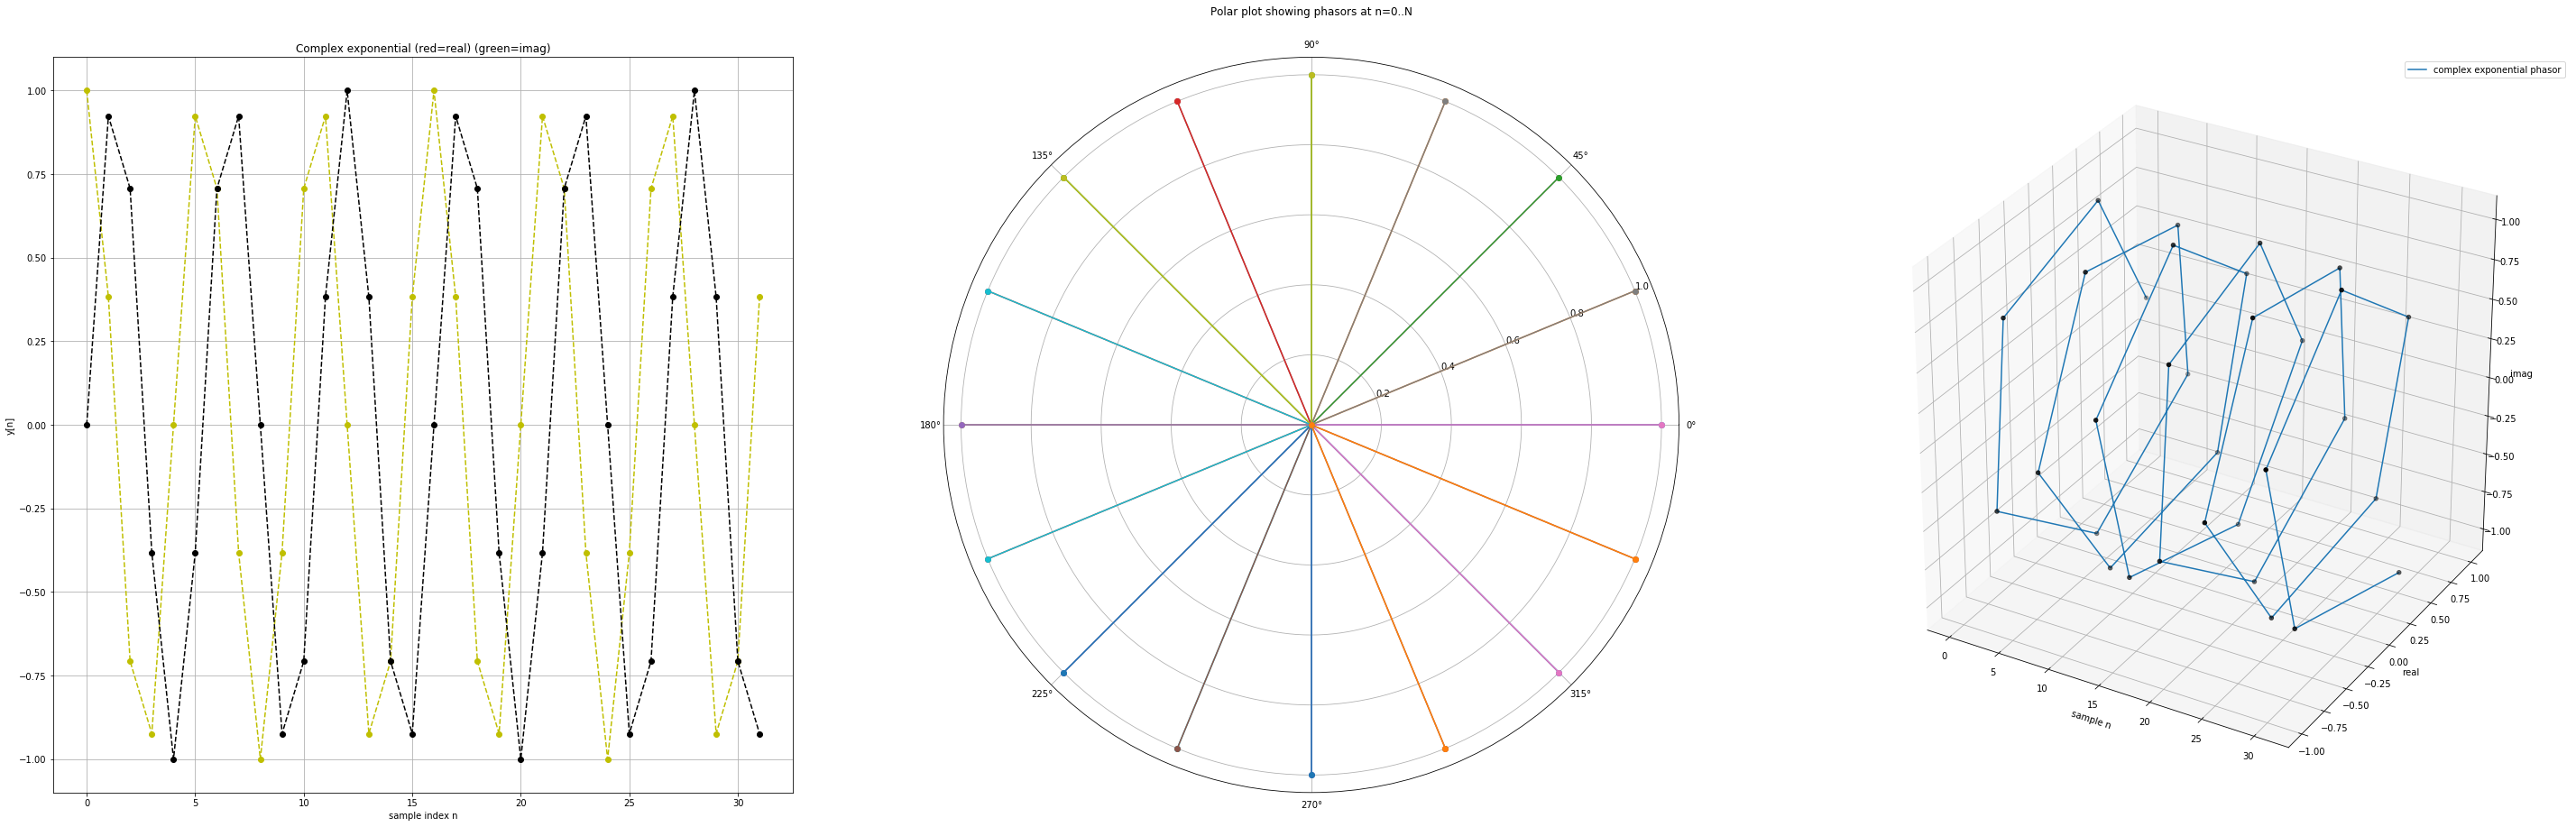

In [172]:
def qn_5(Amp_5 = 1,N_5 = 16,k_5 = 1,phi_5=0,numSamples_5 = 16):
    n_5 = np.arange(0, numSamples_5, 1)
    y_5= np.multiply(np.power(Amp_5, n_5), np.exp(1j * 2*np.pi/N_5*k_5* n_5+phi_5))
    fig = plt.figure(1,figsize=(50,15))
    plt.rcParams['legend.fontsize'] = 10
    plt.subplot(131)
    plt.plot(n_5[0:numSamples_5], y_5[0:numSamples_5].real,'y--o')
    plt.plot(n_5[0:numSamples_5], y_5[0:numSamples_5].imag,'k--o')
    plt.xlabel('sample index n'); plt.ylabel('y[n]')
    plt.title('Complex exponential (red=real) (green=imag)')
    plt.grid()

    plt.subplot(132,projection='polar')
    for y in y_5:
        plt.polar([0,np.angle(y)],[0,np.abs(y)],marker='o')

    plt.title('Polar plot showing phasors at n=0..N')

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    scaling_factor = 1
    scaling = np.array([np.power(scaling_factor,int(i)) for i in range(len(n_5))])
    scaled_y5 = scaling*y_5
    reVal = scaled_y5[0:numSamples_5].real
    imgVal = scaled_y5[0:numSamples_5].imag
    ax.plot(n_5,reVal, imgVal,  label='complex exponential phasor')
    ax.scatter(n_5,reVal,imgVal, c='k', marker='o')
    ax.set_xlabel('sample n')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    ax.legend()
    plt.show()
#qn_5(k_5=0,numSamples_5=32)
qn_5(k_5=3,numSamples_5=32)

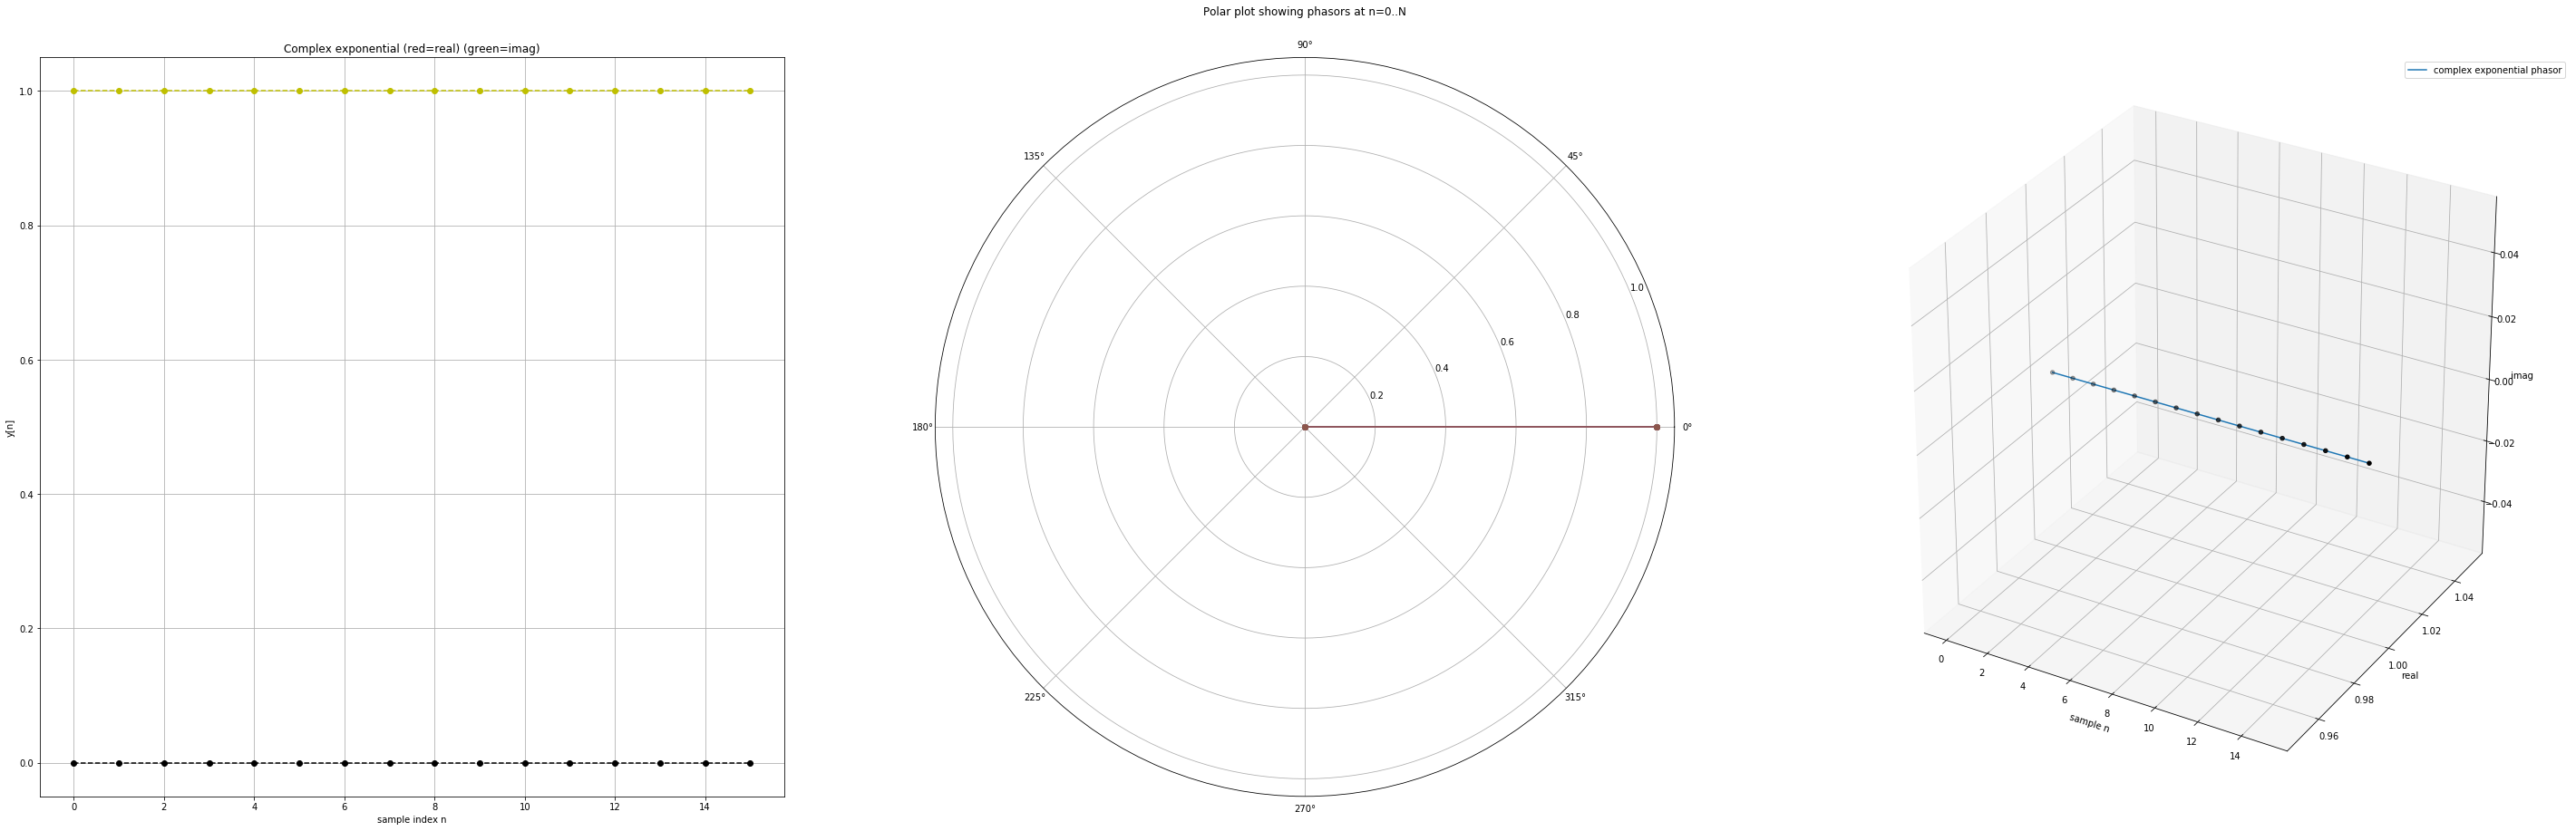

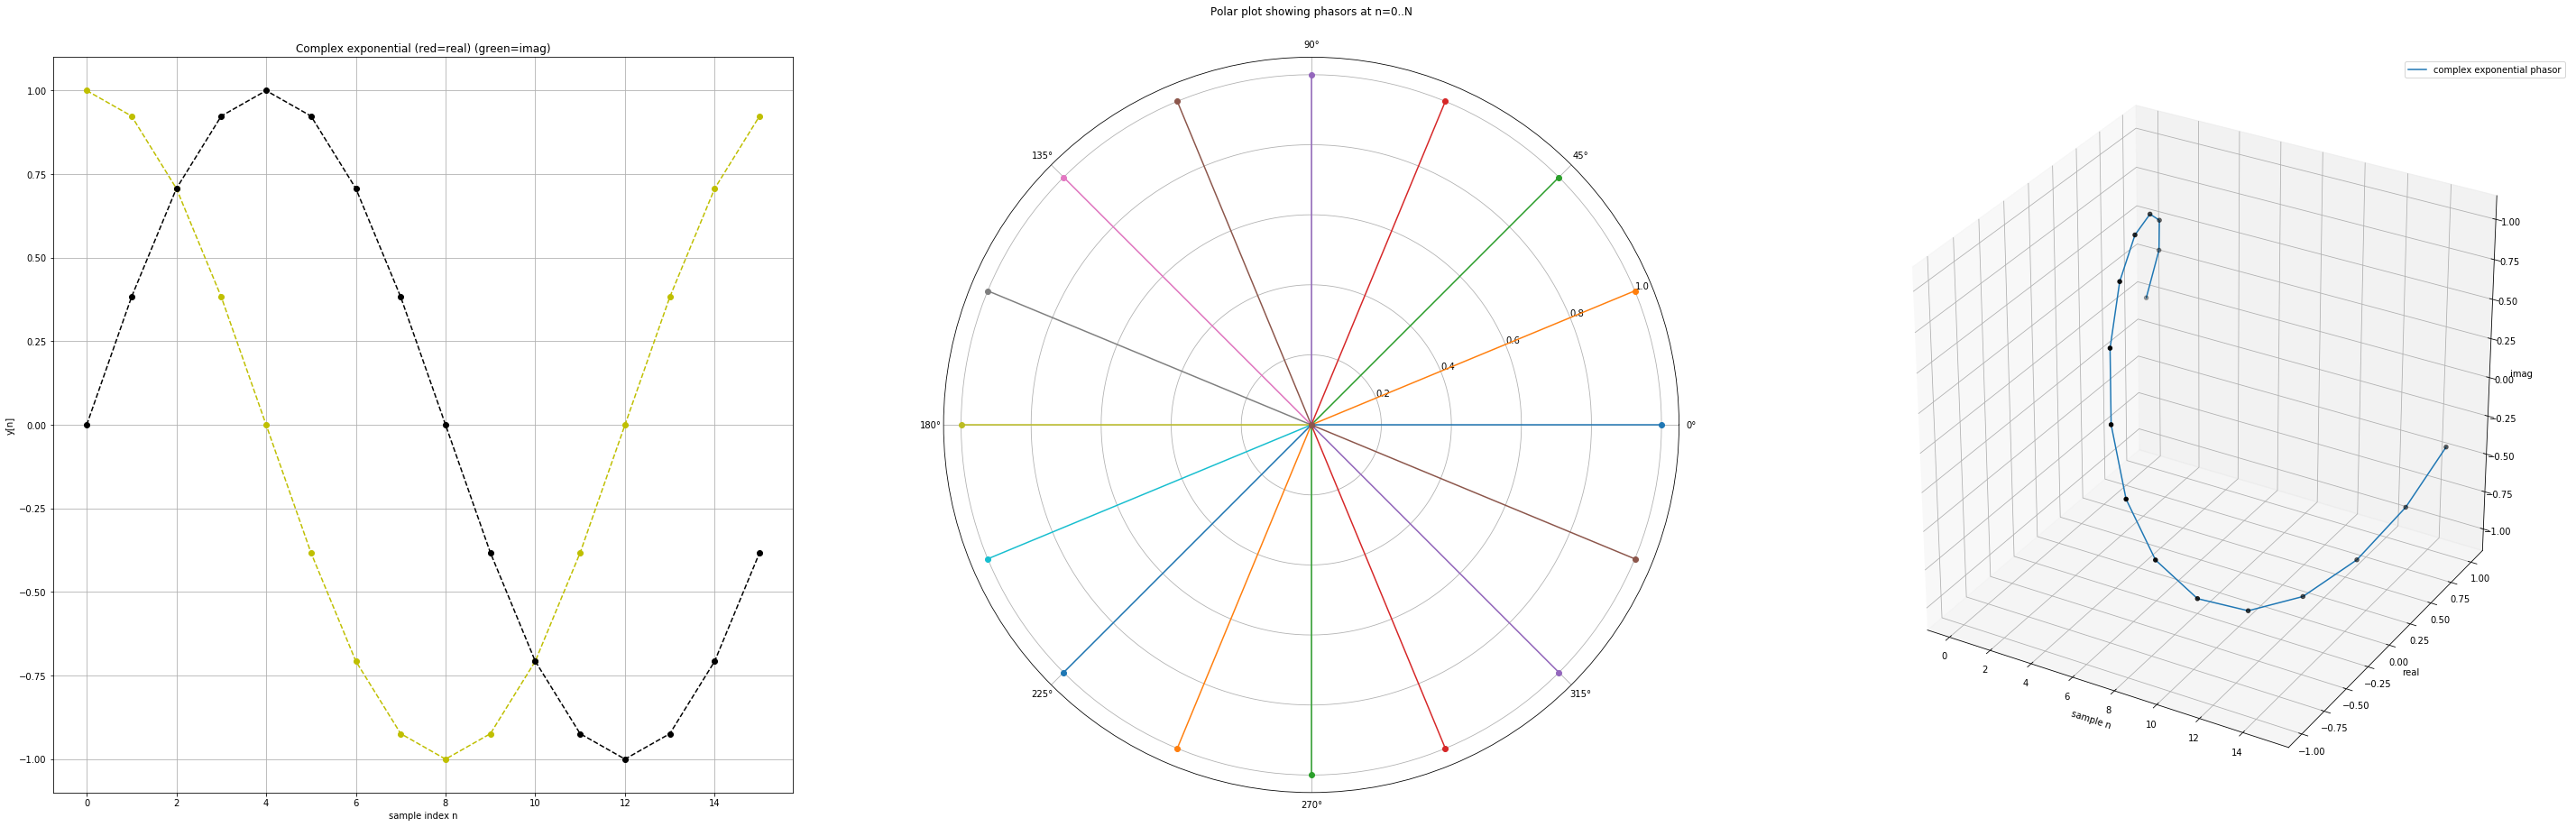

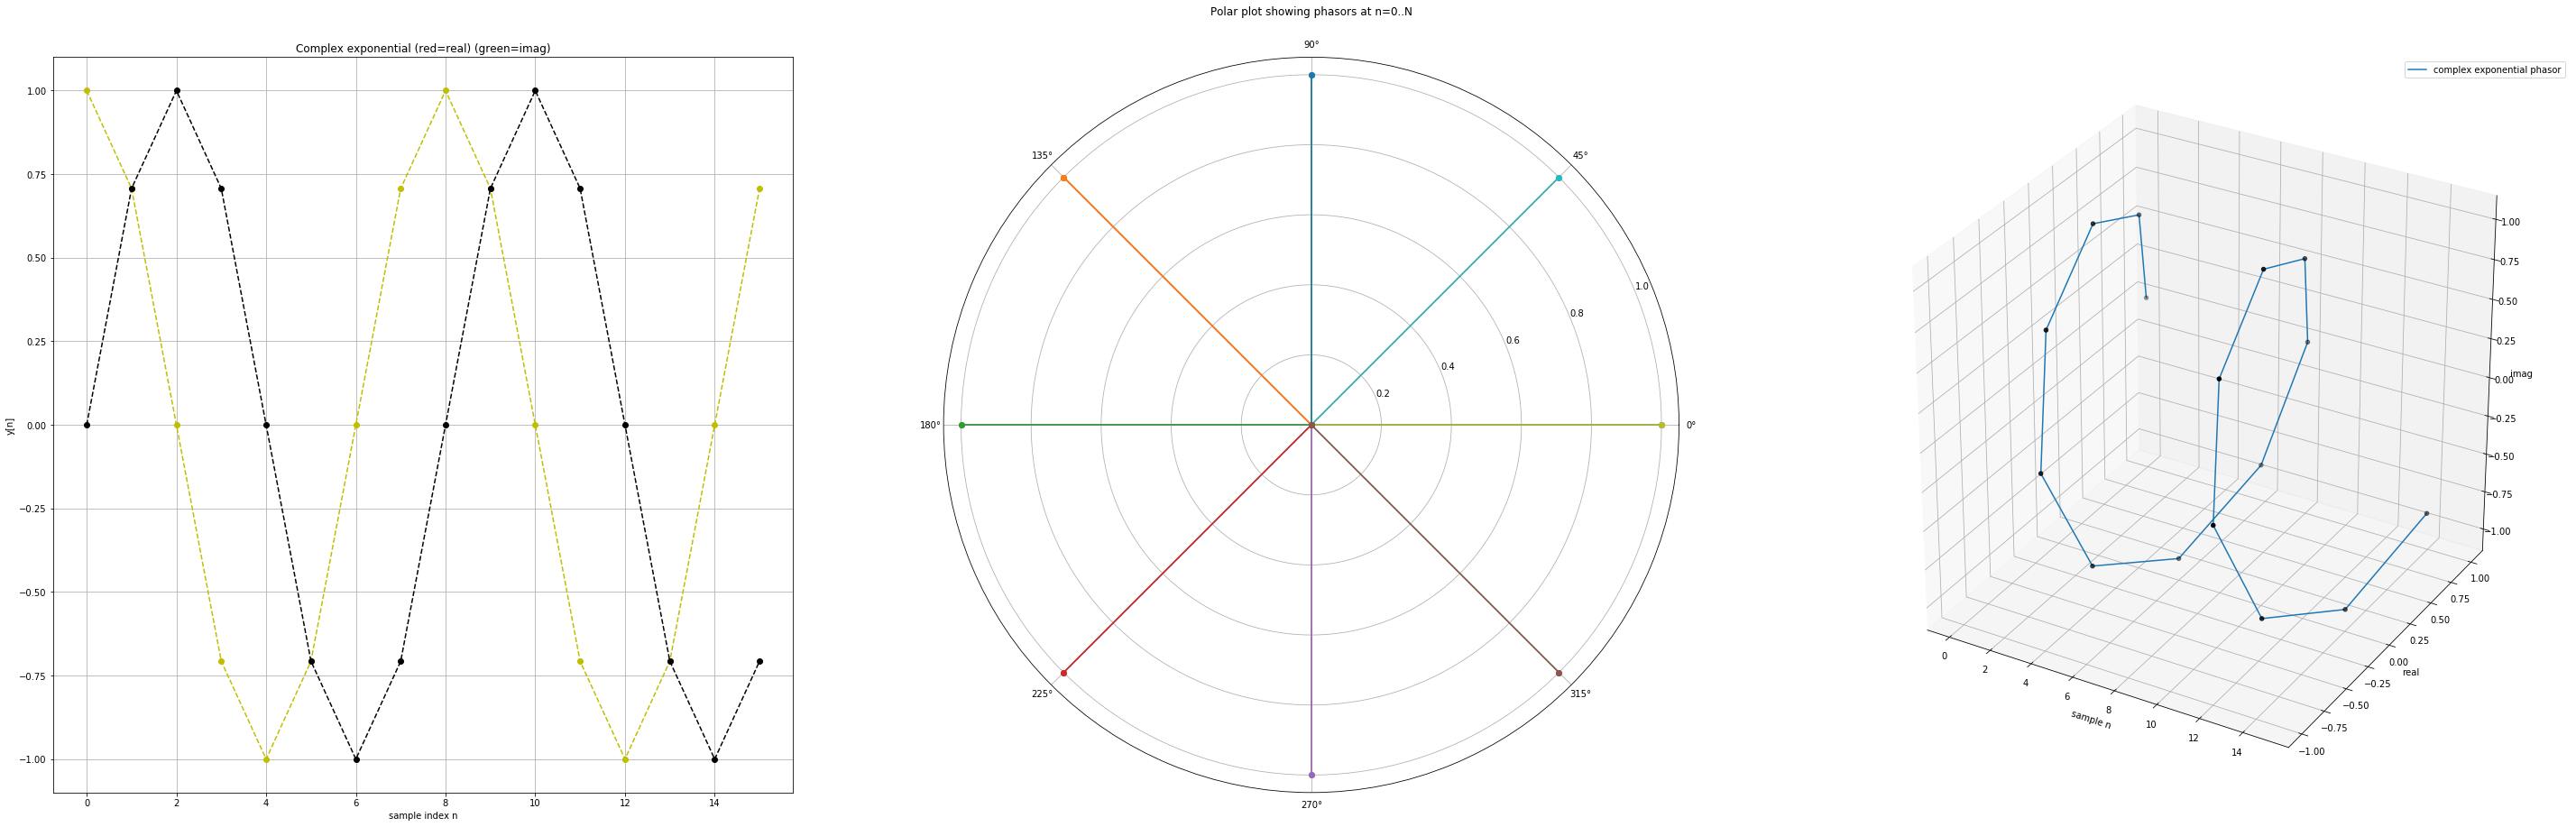

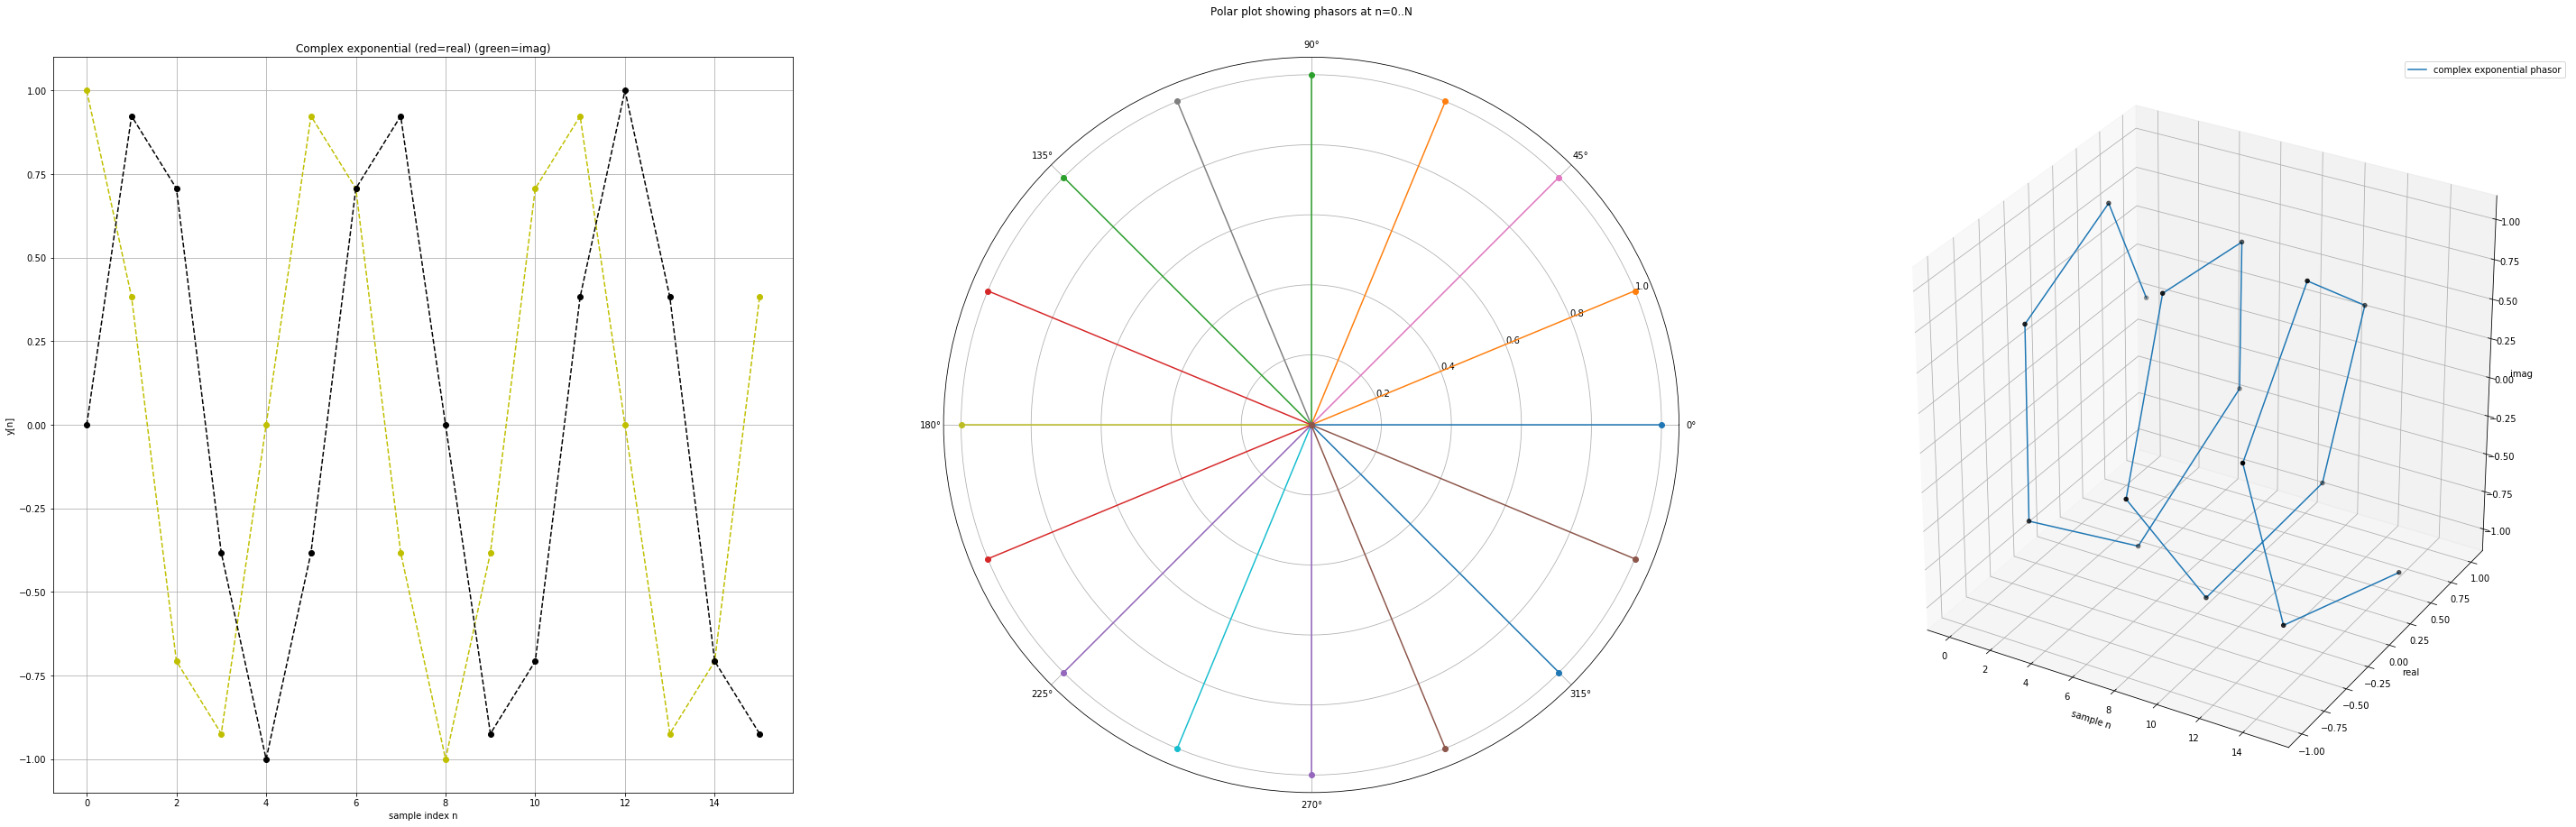

In [176]:
for k in range(4):
    qn_5(k_5=k, numSamples_5=16)

We can see that 
$$\frac{2\pi}{N} k n = \omega n$$
There are a few observation:
* N is number of samples
* k is the number of cycles of it completes after N samples 
* 2 pi k/N is the angular displacement per sample
* if k and N are integers then signal is periodic 
* As u increase k/N (by increasing k and keep N constant at 16), we can see that the digital angular frequency increases and the sampled signal makes more radian per seconds (in 3D plot). As angular frequency increases it will also complete more number of cycles